This worksheet explores Principal Components Analysis.

As we learnt in class, linear SVMs and linear PCA share a lot of common properties that allow them to be adapted to a high dimensional non-linear setting using the kernel approach. Specifically,
* the solutions in both cases can be written as a linear combination of the examples,
* the coefficients of the linear combination above only depend on the pairwise dot products between examples
* any prediction is a dot product of the solution with the test vector, and therefore additionally depends on the dot product between the examples and the test vector.

In both cases, we therefore replace the dot product with the kernel function to get the kernel SVM and kernel PCA. When we do that, we are effectively
* lifting the examples into potentially a much higher dimensional space with a non-linear transform
* performing the linear SVM or linear PCA in the higher dimensional space
* bringing the linear solution in the higher dimensional space back into the example space. But since the transform is non-linear, the linear solution in the high dimensional space looks non-linear in the example space


First, we will see a scattering of points in 3 dimensions, and see that the linear PCA identifies directions where the data is spread out the most.

In [ ]:
import numpy as np
from numpy import random as npr
from numpy import linalg as lin

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [ ]:
threepts=npr.normal(0,1,(3,3))
covariance = threepts @ threepts.T
# verify covariance is positive definite. If any
# eigenvalue is 0, rerun this segment of the code.
# For better visualization, rerun till you find a
# covariance matrix such that one of the eigenvalues
# is very small while the rest are not.
lin.eigvals(covariance)


array([0.22783876, 5.15125462, 7.38613692])

In [ ]:
# ... and this cell. All we care is that Xraw is a matrix of size (50,3).
# There are therefore 50 examples, each example has 3 coordinates.

Xraw = npr.multivariate_normal(npr.normal(0,1,(3,)), covariance, 100)

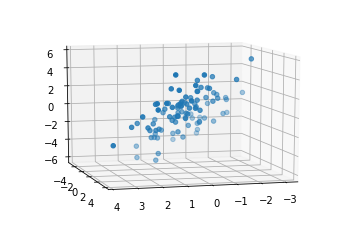

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.set_cmap('jet')

origin = [0],[0],[0]
coordinateaxes = np.array([[2,0,0],[0,2,0],[0,0,2]])
# ax.quiver(*origin, coordinateaxes[:,0], coordinateaxes[:,1],coordinateaxes[:,2],color='black')

ax.scatter(Xraw[:,0],Xraw[:,1],Xraw[:,2])
ax.view_init(10,75)
plt.show()
# each blue point is a vector with three coordinates, each blue point is an example.
# Xraw is the data matrix. there are 50 blue points, each with 3 coordinates. Xraw is a matrix with size 50 (rows) and 3 columns,
# ie (50,3)
# the three little black lines are the coordinate axes (x-, y-, z-)
# if a blue point has coordinates (1,3,5), then the blue point is the tip of a vector corresponding to
# 1 u_x +3 u_y + 5 u_z, where u_x,u_y and u_z are the unit vectors along x,y, and z axes.

[ 25.4485105  305.23669415 862.85572527]


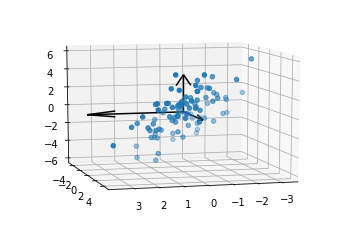

In [ ]:
##### In the picture above, all the points are not centered around the origin.
# It is helpful to work with them if they are centered, so we shift the origin to the centroid of the points.
# The matrix X contains the coordinates of points when we shift the origin of the coordinate system to
# the centroid of the data points.
means = np.mean(Xraw, axis =0)
X = Xraw - means
lambd, v = lin.eig(X.T @ X)
print(lambd)

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.set_cmap('jet')

origin = [0],[0],[0]
coordinateaxes = np.array([[4,0,0],[0,4,0],[0,0,4]])
ax.quiver(*origin, coordinateaxes[0,:], coordinateaxes[1,:],coordinateaxes[2,:],color='black')

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.view_init(10,75)
plt.show()

(100, 100) (3,) (3, 3)
[29.37440596 17.47102442  5.04465167]


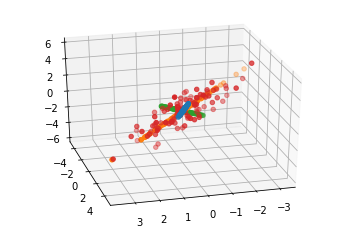

In [ ]:
u,s,vt = lin.svd(X)
print(u.shape, s.shape, vt.shape)
print(s)

u1= u[:,0].reshape(u.shape[0],1)
u2 = u[:,1].reshape(u.shape[0],1)
u3 = u[:,2].reshape(-1,1)
vt1 = vt[0,:].reshape(1,v.shape[1])
vt2 = vt[1,:].reshape(1,v.shape[1])
vt3 = vt[2,:].reshape(1,-1)
Xapprox1 = u1 @ vt1 * s[0]

Xapprox2 = u2 @vt2 *s[1]
Xapprox3 = u3 @vt3*s[2]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.set_cmap('jet')

origin = [0],[0],[0]
coordinateaxes = np.array([[2,0,0],[0,2,0],[0,0,2]])
#ax.quiver(*origin, coordinateaxes[0,:], coordinateaxes[1,:],coordinateaxes[2,:],color='black')

ax.scatter(Xapprox1[:,0],Xapprox1[:,1],Xapprox1[:,2],'blue')
ax.scatter(Xapprox2[:,0],Xapprox2[:,1],Xapprox2[:,2],'purple')
ax.scatter(Xapprox3[:,0],Xapprox3[:,1],Xapprox3[:,2],'yellow')

ax.scatter(X[:,0],X[:,1],X[:,2],'red')
ax.view_init(30,75)
plt.show()

(100, 3)
[ 25.4485105  305.23669415 862.85572527] [[-0.76597439  0.63342063  0.10982501]
 [ 0.4882858   0.46211337  0.74028928]
 [-0.4181629  -0.62066862  0.6632573 ]]
1.0
147.483706171196 -24.71865794861995


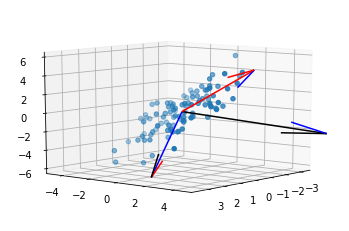

In [ ]:
print(X.shape)
lambd, v = lin.eig(X.T @ X)
print(lambd, v)

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.set_cmap('jet')

ax.scatter(X[:,0],X[:,1],X[:,2])
#origin = np.mean(Xraw,axis=0)
origin = [0],[0],[0]
ax.quiver(*origin, 8*v[0,:],8*v[1,:],8*v[2,:],color=['black','blue','red'])

import math as m
dirt = 0
lenv = np.sqrt(np.dot(v[:,dirt],v[:,dirt]))
print(lenv)
felev = m.asin(v[2,dirt])*180/m.pi
azim = m.atan2(v[1,dirt],v[0,dirt])*180/m.pi
print(azim,felev)
ax.view_init(10,40)


In [ ]:
Vp = v[:,:2]

print(Vp)

print(np.round(Vp.T @ Vp,2))
print(np.round(Vp @ Vp.T,2))

print(np.round(v.T@v, 2))
print(np.round(v@v.T, 2))

# Project every row of X into the col(V)
# Projection of a vector z \in R^3 into the col(V) is V (V^TV)^{-1} V^T z

Xprojection = (Vp @Vp.T @ X.T).T

[[-0.76597439  0.63342063]
 [ 0.4882858   0.46211337]
 [-0.4181629  -0.62066862]]
[[1. 0.]
 [0. 1.]]
[[ 0.99 -0.08 -0.07]
 [-0.08  0.45 -0.49]
 [-0.07 -0.49  0.56]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]]


1.0
147.483706171196 -24.71865794861995


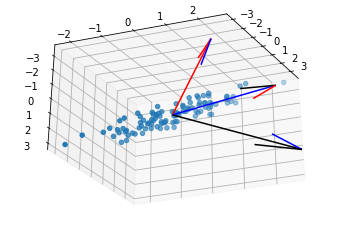

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.set_cmap('jet')

origin = [0],[0],[0]
ax.quiver(*origin, 5*v[0,:],5*v[1,:],5*v[2,:],color=['red','blue','black'])

ax.scatter(Xprojection[:,0],Xprojection[:,1],Xprojection[:,2])

dirt = 0
lenv = np.sqrt(np.dot(v[:,dirt],v[:,dirt]))
print(lenv)
felev = m.asin(v[2,dirt])*180/m.pi
azim = m.atan2(v[1,dirt],v[0,dirt])*180/m.pi
print(azim,felev)
ax.view_init(azim,felev)

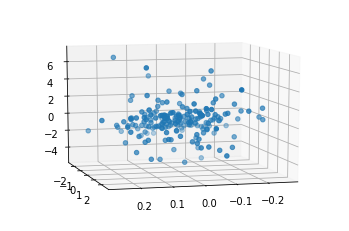

[  1.89273843 169.41251472 682.98390036]
[[-1.   -0.01  0.  ]
 [-0.01  0.98  0.2 ]
 [ 0.   -0.2   0.98]]


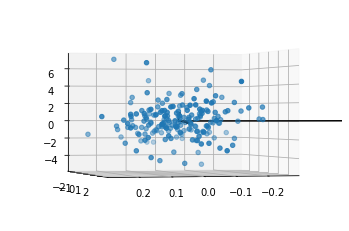

In [ ]:
cova =np.array([[.01,0,0],[0,1,1],[0,1,1]])
covb = np.array([[.01,0,0],[0,1,0],[0,0,5]])

Xrawa = npr.multivariate_normal((0,0,0), cova, 100)
Xrawb = npr.multivariate_normal((0,0,0), covb, 100)
Xraw = np.vstack((Xrawa,Xrawb))
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.set_cmap('jet')

origin = [0],[0],[0]
coordinateaxes = np.array([[2,0,0],[0,2,0],[0,0,2]])
# ax.quiver(*origin, coordinateaxes[:,0], coordinateaxes[:,1],coordinateaxes[:,2],color='black')

ax.scatter(Xraw[:,0],Xraw[:,1],Xraw[:,2])
ax.view_init(10,75)
plt.show()

##### In the picture above, all the points are not centered around the origin.
# It is helpful to work with them if they are centered, so we shift the origin to the centroid of the points.
# The matrix X contains the coordinates of points when we shift the origin of the coordinate system to
# the centroid of the data points.
means = np.mean(Xraw, axis =0)
X = Xraw - means
lambd, v = lin.eig(X.T @ X)
print(lambd)

print(np.round(v,2))
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.set_cmap('jet')

origin = [0],[0],[0]
coordinateaxes = np.array([[4,0,0],[0,4,0],[0,0,4]])
ax.quiver(*origin, v[0,:], v[1,:],v[2,:],color='black')

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.view_init(0,75)
plt.show()

The simplest way to see this is that PCA finds a new coordinate system, where the coordinate axes (eigenvectors of X^TX) are labeled with their importance (the eigenvalue). Larger the eigenvalue the more important an axis is. To project into a lower dimension, all we need to do is to discard eigendirections with small eigenvalues.

The new coordinate system are the eigenvalues of X^TX, ie the columns of the matrix v are the three unit vectors in the picture above.

### Problem 1  
Obtain the coordinates of each row of the centered data matrix X in the coordinate system formed by the columns of v. Note that the terminology is different, but all you are doing is "project" the points into the column space of v, the coefficents thus obtained are the coordinates you are asked to compute. And you project using linear regression/or as you worked in the previous lab. I use "project" in quotes since the column space of v will perfectly represent all the points, the projection of any blue point in the picture above is just the point itself.


A striking visual way to see this is as follows. Think of the images we classified before from the MNIST dataset.For this demo, we look at just one image. Let us now visualize a 28x28 image as 28 examples, each with size 28. We want to see if we can project every row of the image ("example") into a small dimensional space, so that we capture as much of the image as possible.

What may be your guess as to how few dimensions we need? Turns out it is as small as 3 or 4 in most cases. Essentially, instead of the default coordinate system, we use the coordinate system of the eigenvectors. But we only need 3 eigendirections to reconstruct any rows, so that the overall image is something recognizable!

In [ ]:
from keras.datasets import mnist

(mnist_X, mnist_y), (mnist_test, mnist_testlabels) = mnist.load_data()

ModuleNotFoundError: No module named 'keras'

(60000, 28, 28)


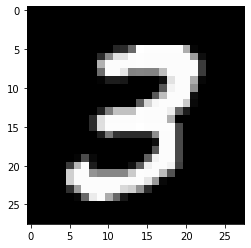

In [ ]:
print(mnist_X.shape)
im = mnist_X[7]
plt.imshow(im,cmap='gray')


In [ ]:
X = im-np.mean(im, axis =0)
lambd, v = lin.eig(X.T @ X)


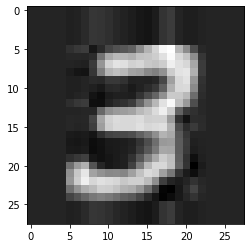

In [ ]:
W = np.array(np.vstack((v[:,0:4])))
plt.imshow( np.add((W @ W.T @ X.T).T,np.mean(im,axis=0)),cmap='gray' )

(734, 1024)


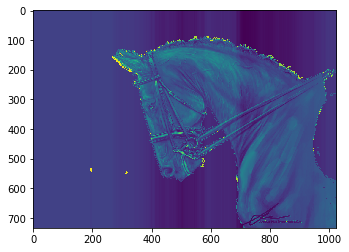

In [ ]:
impng = plt.imread('horse.png')
X = impng[:,:,0] - np.mean(impng[:,:,0],axis=0)
print(X.shape)
lambd, v = lin.eig(X.T @ X)
plt.imshow(X,cmap='viridis')

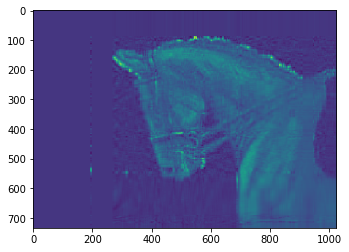

In [ ]:
W = np.array(np.vstack((v[:,0:25])))
plt.imshow( np.add((W @ W.T @ X.T).T,np.mean(impng[:,:,0],axis=0)),cmap='viridis')

In [ ]:
v1 = np.array([[1],[1]])
v2 = np.array([[1],[-1]])
A = v1 @ v1.T -2 *v2 @ v2.T
print(A)

[[-1  3]
 [ 3 -1]]


In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape


(400, 4096)

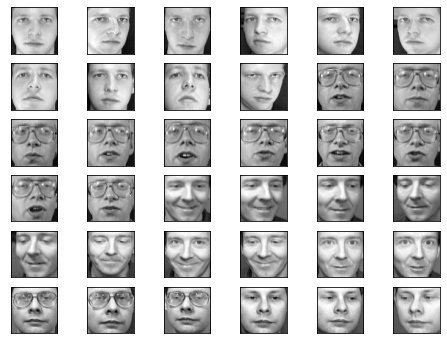

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1 , xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap='gray')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


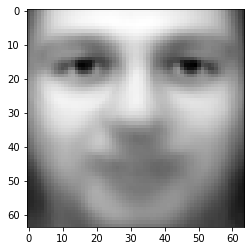

In [ ]:
mean = np.mean(X_train, axis =0)
plt.imshow(mean.reshape(64,64), cmap='gray')

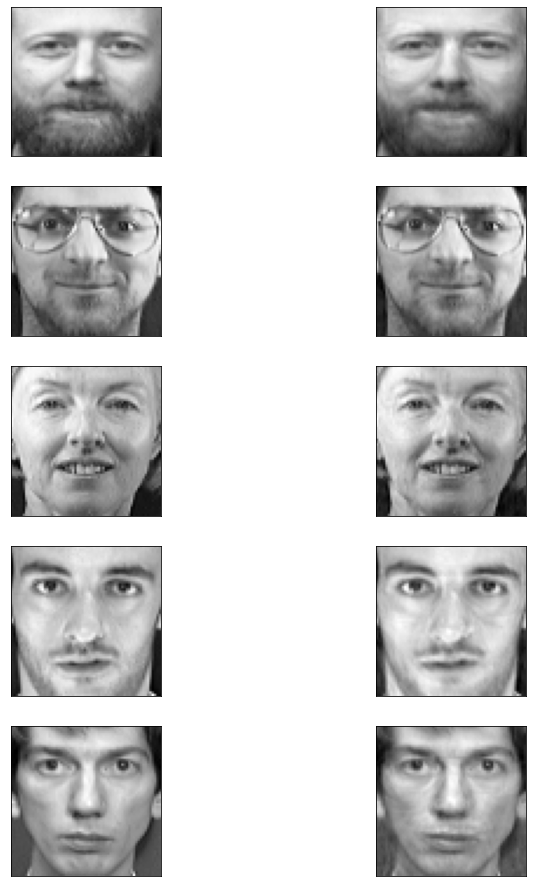

In [ ]:
X = X_train - mean
lambd, u = lin.eig(X @ X.T)
lambd[150:] = 0

v = X.T @ u
norms = np.sqrt(np.diag(v.T @ v))
v = v @ lin.inv(np.diag(norms))

# Project each image into col(v[:,:150])
coeffs = v[:,:150].T @ (X_train - mean).T
X_train_approxT = v[:,:150] @ coeffs
X_train_approx = X_train_approxT.T

train_transform = coeffs.T

# the line below does the same thing as the projection above
Xapprox = u[:, :150] @ np.diag(lambd[:150]) @ v[:,:150].T



fig = plt.figure(figsize=(12,16))
for i in range(5):
    ax = fig.add_subplot(5,2, 2*i+1 , xticks=[], yticks=[])
    ax.imshow((X[i,:]+mean).reshape(64,64), cmap='gray')
    ax = fig.add_subplot(5,2, 2*i+2 , xticks=[], yticks=[])
    ax.imshow((X_train_approx[i,:]+mean).reshape(64,64), cmap='gray')



1.2745637e-11 0.00066655903 1.0


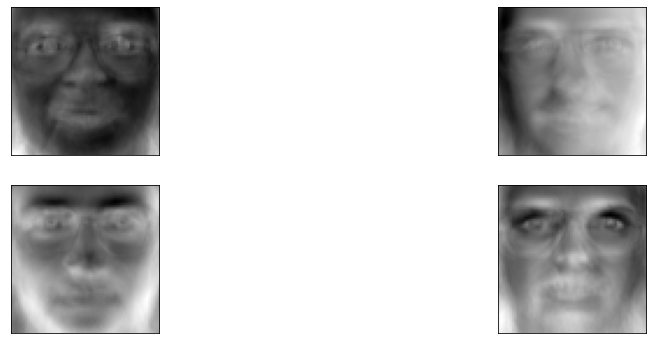

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
    ax.imshow((v[:,i]).reshape(faces.images[0].shape),cmap='gray')


print(np.min(v[:,0]**2), np.max(v[:,0]**2), np.sum(v[:,0]**2))
#plt.imshow((v[:,0]).reshape(faces.images[0].shape),cmap='gray')

In [ ]:
# project each image in X_test (ie each row of X_test) into col(v[:,:150])
coeffs = v[:,:150].T @ (X_test - mean).T

# all the information is in the coeffs, the reconstruction is for visual purposes
X_test_approxT = v[:,:150] @ coeffs
X_test_approx = X_test_approxT.T+mean

test_transform = coeffs.T

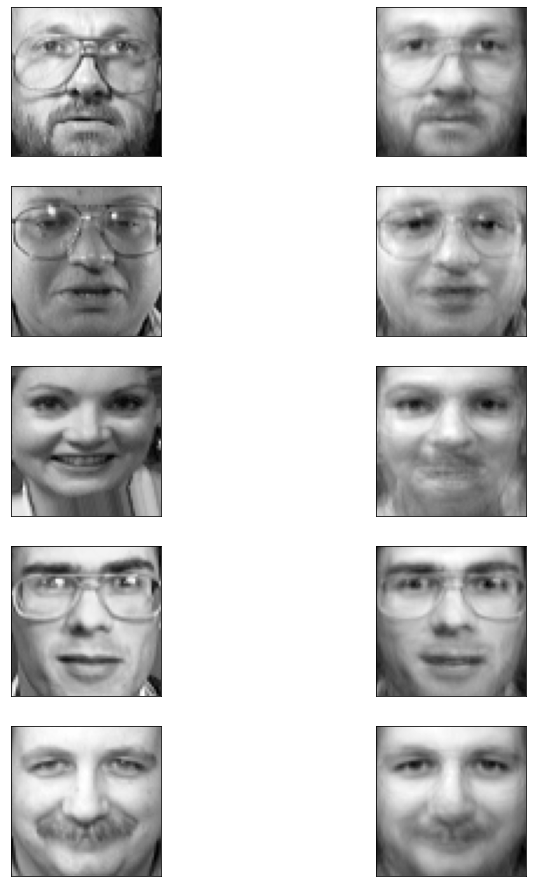

In [ ]:
fig = plt.figure(figsize=(12,16))
for i in range(5):
    ax = fig.add_subplot(5,2, 2*i+1 , xticks=[], yticks=[])
    ax.imshow((X_test[i,:]).reshape(64,64), cmap='gray')
    ax = fig.add_subplot(5,2, 2*i+2 , xticks=[], yticks=[])
    ax.imshow((X_test_approx[i,:]+mean).reshape(64,64), cmap='gray')


In [ ]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.01)
clf.fit(train_transform, y_train)

y_pred = clf.predict(test_transform)

print(len(np.where(y_pred -y_test)[0])/len(y_test))

0.02


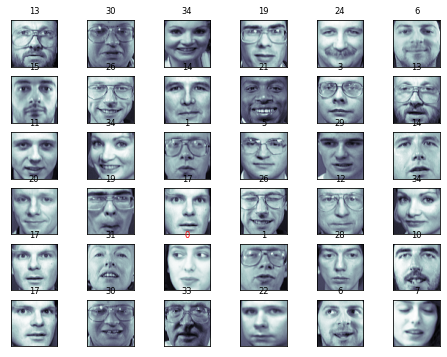

In [ ]:
fig = plt.figure(figsize=(8, 6))
for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(test_transform[i,np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [ ]:
y_pred = clf.predict(test_transform)

from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))


[[2 0 0 ... 0 0 1]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from numpy import random as npr

npr.permutation(3)

array([0, 2, 1])